In [12]:
#Making a Time Series Stationary
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
train=pd.read_csv('AirPassengers.csv')
train.info()
train.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [15]:
train.timestamp=pd.to_datetime(train.Month)
train.index=train.timestamp
train.drop('Month',axis=1,inplace=True)
train.info()
#train.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [16]:
train.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


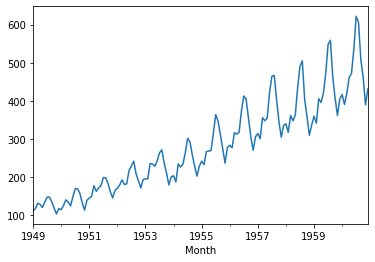

In [17]:
train['#Passengers'].plot();

In [18]:
# Here visual observation that time series is not stationary 

Methods to make time series Stationary :

Differencing In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:


In [19]:
# i. e  yt=yt-y(t-1)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: #Passengers, dtype: int64
Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
Name: #Passengers, dtype: float64
Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
Name: #Passengers_diff, dtype: float64


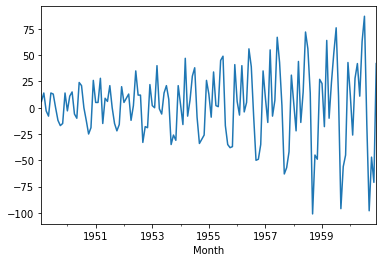

In [21]:
train['#Passengers_diff']=train['#Passengers']-train['#Passengers'].shift(1)
print(train['#Passengers'].head(3))
print(train['#Passengers'].shift(1).head(3))
print(train['#Passengers_diff'].head(3))

train['#Passengers_diff'].dropna().plot();

In [22]:
#Seasonal Differencing

<AxesSubplot:xlabel='Month'>

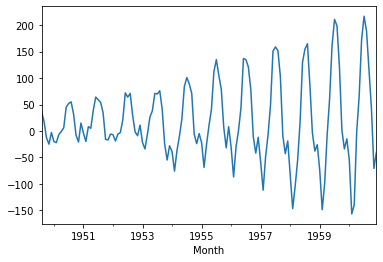

In [24]:
n=7
train['#Passengers_diff']=train['#Passengers']-train['#Passengers'].shift(n)
train['#Passengers_diff'].dropna().plot()

In [27]:
# Transformation 
import numpy as np

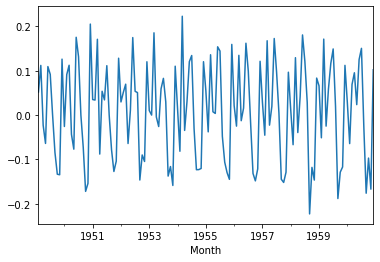

In [29]:
train['#Passengers_log']=np.log(train['#Passengers'])
train['#Passengers_log_diff']=train['#Passengers_log']-train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot();